In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

In [2]:
df=pd.read_csv('../Data/RSCCASN.csv',index_col=0,parse_dates=True)

In [3]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [4]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01'],
              dtype='datetime64[ns]', name='DATE', length=334, freq=None)

In [5]:
df.columns

Index(['RSCCASN'], dtype='object')

c:\users\karthikgowda\.conda\envs\mytfenv\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


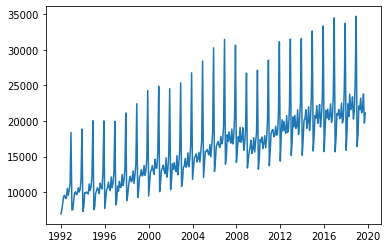

In [6]:
plt.plot(df)

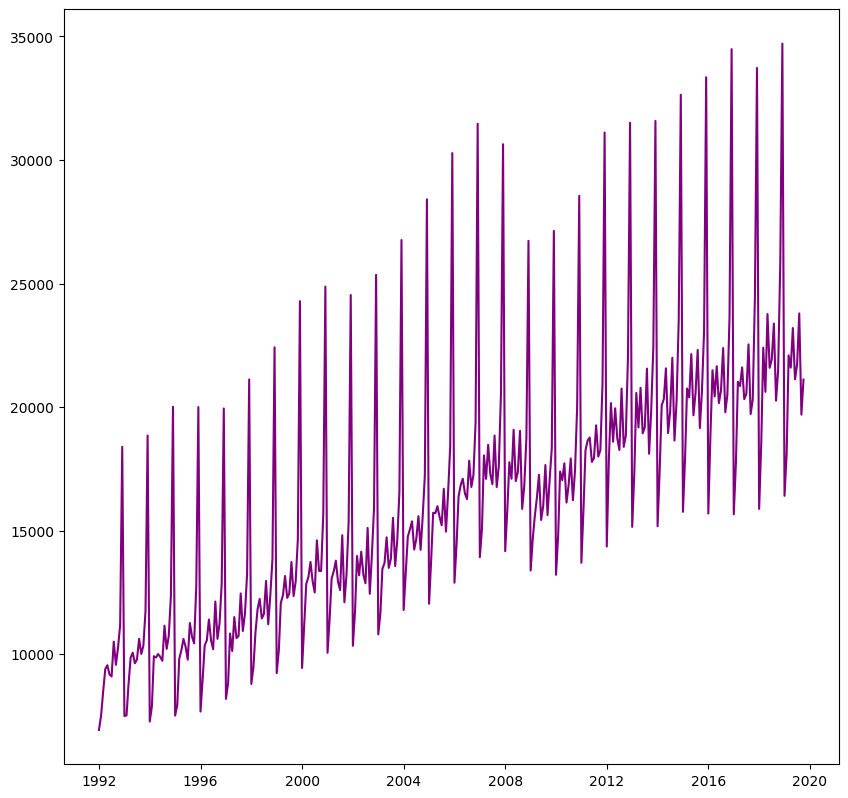

In [7]:
plt.figure(figsize=(10,10),dpi=100)
plt.plot(df,color="purple")

In [8]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [9]:
df.tail()

,RSCCASN
DATE,
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791
2019-09-01,19695
2019-10-01,21113


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
RSCCASN    334 non-null int64
dtypes: int64(1)
memory usage: 5.2 KB


In [11]:
df.describe()

,RSCCASN
count,334.000000
mean,16325.095808
std,5369.839014
min,6938.000000
25%,12298.500000
50%,15878.500000
75%,19772.500000
max,34706.000000


In [12]:
df.isnull()

,RSCCASN
DATE,
1992-01-01,False
1992-02-01,False
1992-03-01,False
1992-04-01,False
1992-05-01,False
...,...
2019-06-01,False
2019-07-01,False
2019-08-01,False


In [13]:
df.isnull().sum()

RSCCASN    0
dtype: int64

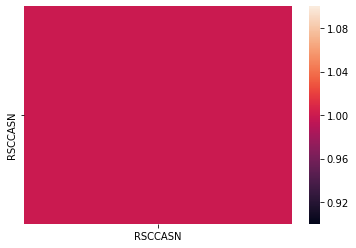

In [14]:
sns.heatmap(df.corr())

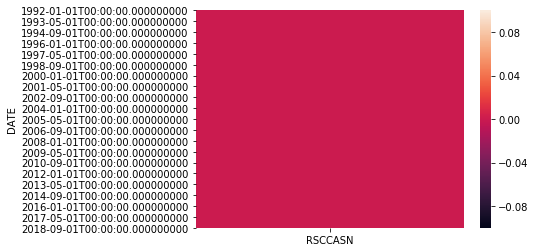

In [15]:
sns.heatmap(df.isnull())

In [16]:
test_percent=0.1

In [17]:
len(df)

334

In [18]:
test_index=int(np.round(len(df)-len(df)*test_percent))

In [19]:
test_index

301

In [20]:
train=df[0:test_index:]
test=df[test_index::1]

In [21]:
train

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2016-09-01,19790
2016-10-01,20500
2016-11-01,23644


In [22]:
test

,RSCCASN
DATE,
2017-02-01,17745
2017-03-01,21028
2017-04-01,20852
2017-05-01,21606
2017-06-01,20322
2017-07-01,20535
2017-08-01,22536
2017-09-01,19720
2017-10-01,20307


In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler=MinMaxScaler()

In [25]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [26]:
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [27]:
len(scaled_test)

33

In [28]:
length=16
batch_size=1

In [29]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [30]:
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)

In [31]:
validation_generator=TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=batch_size)

In [32]:
from tensorflow.keras.models import load_model,Sequential

In [33]:
from tensorflow.keras.layers import Dense,Activation,Dropout,LSTM

In [34]:
from tensorflow.keras.optimizers import Adam

In [35]:
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

In [36]:
early_stop=EarlyStopping(monitor="val_loss",mode="min",patience=10,verbose=1)

In [37]:
n_features=1

In [38]:
model=Sequential()
model.add(LSTM(100,input_shape=(length,n_features),activation="relu"))
model.add(Dense(1))
model.compile(loss="mse",optimizer="adam")

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.fit_generator(generator,validation_data=validation_generator,epochs=600,verbose=1,callbacks=[early_stop])

Epoch 1/600
285/285 [==============================] - 13s 45ms/step - loss: 0.0264 - val_loss: 0.0236
Epoch 2/600
285/285 [==============================] - 14s 50ms/step - loss: 0.0209 - val_loss: 0.0191
Epoch 3/600
285/285 [==============================] - 13s 45ms/step - loss: 0.0201 - val_loss: 0.0226
Epoch 4/600
285/285 [==============================] - 13s 47ms/step - loss: 0.0191 - val_loss: 0.0179
Epoch 5/600
285/285 [==============================] - 14s 48ms/step - loss: 0.0184 - val_loss: 0.0157
Epoch 6/600
285/285 [==============================] - 14s 49ms/step - loss: 0.0162 - val_loss: 0.0146
Epoch 7/600
285/285 [==============================] - 14s 49ms/step - loss: 0.0152 - val_loss: 0.0143
Epoch 8/600
285/285 [==============================] - 13s 47ms/step - loss: 0.0141 - val_loss: 0.0144
Epoch 9/600
285/285 [==============================] - 13s 45ms/step - loss: 0.0135 - val_loss: 0.0154
Epoch 10/600
285/285 [==============================] - 13s 46ms/step - l

In [41]:
losses=pd.DataFrame(model.history.history)

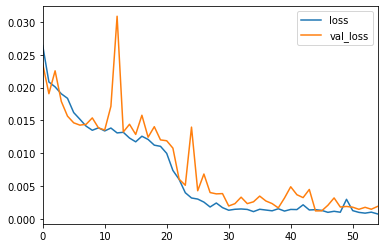

In [42]:
losses.plot.line()

In [43]:
prediction=[]

In [44]:
first_eval_batch=scaled_train[-length::]

In [45]:
current_eval_batch=first_eval_batch.reshape(1,length,n_features)

In [46]:
for i in scaled_test:
    current_pred=model.predict(current_eval_batch)[0]
    prediction.append(current_pred)
    current_eval_batch=np.append(current_eval_batch[:,1:,:],[[current_pred]],axis=1)

In [47]:
true_prediction=scaler.inverse_transform(prediction)

In [48]:
test

,RSCCASN
DATE,
2017-02-01,17745
2017-03-01,21028
2017-04-01,20852
2017-05-01,21606
2017-06-01,20322
2017-07-01,20535
2017-08-01,22536
2017-09-01,19720
2017-10-01,20307


In [49]:
true_prediction

array([[18089.45453167],
       [19914.72792864],
       [19464.53536034],
       [20965.74694204],
       [20169.19758892],
       [20105.19887733],
       [20922.40637493],
       [19718.50428677],
       [19745.15317822],
       [21867.36503315],
       [31227.36129951],
       [15942.90865326],
       [17127.56450224],
       [18633.20880985],
       [18158.19790173],
       [20268.00469112],
       [19846.27186489],
       [19620.07150364],
       [20215.65419817],
       [19631.23376417],
       [19574.82978964],
       [21450.42447615],
       [30262.80014229],
       [15441.92115045],
       [17271.71674871],
       [18451.96613979],
       [18126.59420776],
       [20081.70543003],
       [19848.18778753],
       [19597.75026608],
       [20131.00883436],
       [19865.94988441],
       [19808.48533916]])

In [50]:
test["pred"]=true_prediction

c:\users\karthikgowda\.conda\envs\mytfenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
test

,RSCCASN,pred
DATE,,
2017-02-01,17745,18089.454532
2017-03-01,21028,19914.727929
2017-04-01,20852,19464.535360
2017-05-01,21606,20965.746942
2017-06-01,20322,20169.197589
2017-07-01,20535,20105.198877
2017-08-01,22536,20922.406375
2017-09-01,19720,19718.504287
2017-10-01,20307,19745.153178


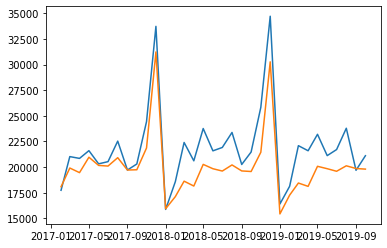

In [52]:
plt.plot(test)

In [53]:
model.save("rnnmodel.h5")